In [1]:
# %matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

### Define dataset

In [2]:
np.random.seed(12)
N = 1000
std = 0.7

bananas = pd.DataFrame(
    {'length': np.random.normal(9, std, N),
     'width': np.random.normal(4, std, N),
     'class': np.zeros(N, dtype='int')})

apples = pd.DataFrame(
    {'length': np.random.normal(6, std, N),
     'width': np.random.normal(5, std, N),
     'class': np.ones(N, dtype='int')})

fruits = pd.concat([bananas, apples])

### Scatter Plot

[link](https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html)

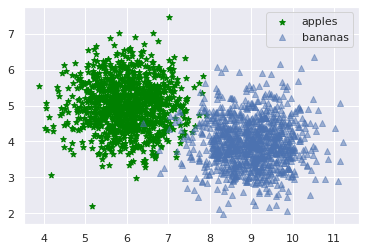

In [3]:
plt.scatter(data=apples, x='length', y='width', marker='*', label='apples', color='green')
plt.scatter(data=bananas, x='length', y='width', marker='^', alpha=0.5, label='bananas')
plt.legend()

### Bar Chart

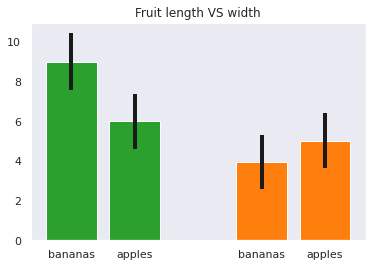

In [4]:
labels = ['bananas', 'apples', 'bananas', 'apples']
x = [1, 1.5, 2.5, 3.0]
height = [fruits.loc[fruits['class'] == 0, 'length'].mean(),
          fruits.loc[fruits['class'] == 1, 'length'].mean(),
          fruits.loc[fruits['class'] == 0, 'width'].mean(),
          fruits.loc[fruits['class'] == 1, 'width'].mean()]
yerr = [2*fruits.loc[fruits['class'] == 0, 'length'].std(),
        2*fruits.loc[fruits['class'] == 1, 'length'].std(),
        2*fruits.loc[fruits['class'] == 0, 'width'].std(),
        2*fruits.loc[fruits['class'] == 1, 'width'].std()]
color = ['tab:green', 'tab:green', 'tab:orange', 'tab:orange']

plt.bar(x=x,
        height=height,
        color=color,
        width=0.4,
        error_kw={'lw': 4},
        yerr=yerr)
plt.xticks(ticks=x, labels=labels)
plt.title('Fruit length VS width')

plt.grid()

<AxesSubplot:xlabel='class', ylabel='width'>

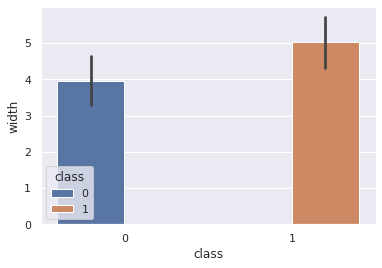

In [19]:
# try to create same results with seaborn

sns.barplot(x='class', y="width", hue="class", data=fruits, ci="sd")
# sns.barplot(x='class', y="length", hue="class", data=fruits, ci="sd")

### Box diagram

Text(0.5, 1.0, 'Length Distribution ')

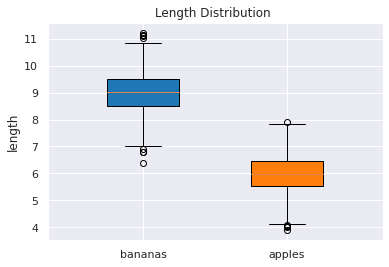

In [6]:
fea = 'length'
plt.boxplot(x=fea, data=fruits.loc[fruits['class'] == 0],
            patch_artist=True, boxprops={'facecolor': 'tab:blue'},
            positions=[0], labels=['bananas'], widths=[0.15])
plt.boxplot(x=fea, data=fruits.loc[fruits['class'] == 1],
            patch_artist=True, boxprops={'facecolor': 'tab:orange'},
            positions=[0.3], labels=['apples'], widths=[0.15])
plt.ylabel('length')
plt.xlim(-0.2, 0.5)
plt.title('Length Distribution ')

<AxesSubplot:xlabel='class', ylabel='length'>

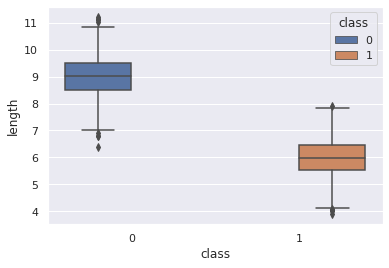

In [22]:
sns.boxplot(x='class', y='length', data=fruits, hue='class')

### Histogram

Text(0.5, 0, 'Width')

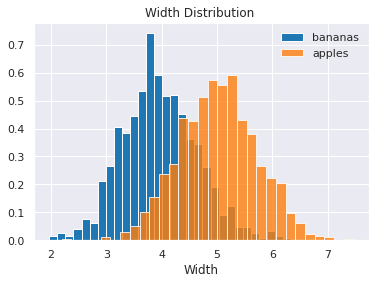

In [7]:
fea = 'width'

plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0],
         bins=30, density=True, color='tab:blue', label='bananas',)
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1],
         bins=30, density=True, color='tab:orange', label='apples', alpha=0.8)
plt.legend(frameon=False)
plt.title('Width Distribution ')
plt.xlabel('Width')

<AxesSubplot:xlabel='width', ylabel='Density'>

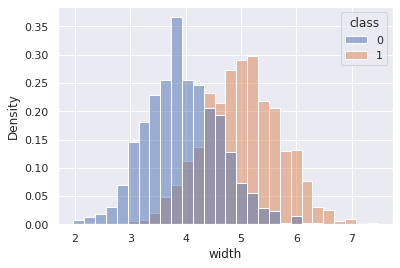

In [25]:
sns.histplot(data=fruits, x='width', hue='class',stat='density')

### Joint distribution histogram

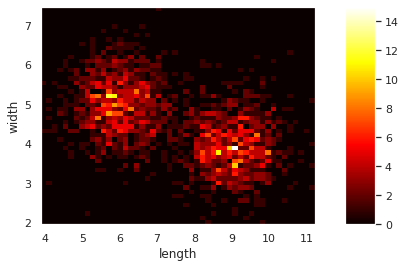

In [8]:
fig, (ax, cax) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [0.9, 0.1]})
_, _, _, mappable = ax.hist2d(
    x='length', y='width', bins=50, data=fruits, cmap=plt.cm.hot)
ax.set_xlabel('length')
ax.set_ylabel('width')

plt.colorbar(mappable=mappable, cax=cax, ax=ax)

In [27]:
# sns.JointGrid(data=fruits, x="length", y="width", space=0)

### Aspect ratio

Text(0.5, 0, 'L/W ratio')

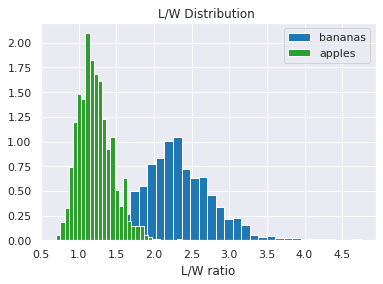

In [28]:
fea = 'L/W'
fruits[fea] = fruits['length']/fruits['width']

plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0],
         bins=30, density=True, color='tab:blue', label='bananas',)
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1],
         bins=30, density=True, color='tab:green', label='apples',)
plt.legend()
plt.title('L/W Distribution ')
plt.xlabel('L/W ratio')

### Area Distribution

Text(0.5, 0, 'Area')

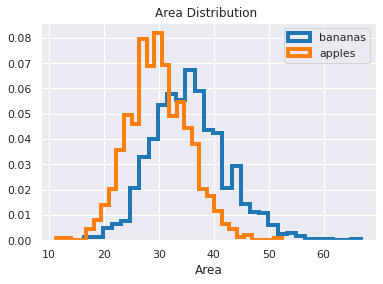

In [10]:
fea = 'area'
fruits[fea] = fruits['length']*fruits['width']
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0], histtype='step', lw=4,
         bins=30, density=True, color='tab:blue', label='bananas')
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1], histtype='step', lw=4,
         bins=30, density=True, color='tab:orange', label='apples')
plt.title('Area Distribution ')
plt.legend()
plt.xlabel('Area')

### Perimeter Distribution

Text(0.5, 0, 'Circumference')

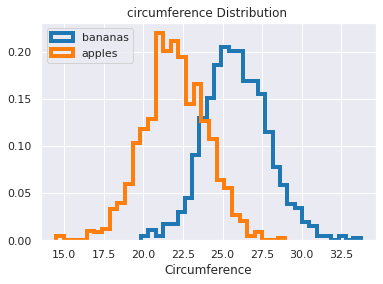

In [11]:
fea = 'circumference'
fruits[fea] = 2*(fruits['length']+fruits['width'])
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0], histtype='step', lw=4,
         bins=30, density=True, color='tab:blue', label='bananas')
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1], histtype='step', lw=4,
         bins=30, density=True, color='tab:orange', label='apples')
plt.title('circumference Distribution ')
plt.legend()
plt.xlabel('Circumference')